# Lab 9

## Exercise 8.4

In [2]:
import pylab as plt
import numpy as np
%matplotlib inline

In [3]:
def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

In [4]:
g = 9.81 # m/s^2
l = 0.1 # m

def pendulum (t,r):
    """Returs the result of the coupled differential calculation of pendulum motion
    
    Arguements: t - time
                r - array containing theta and omega
    
    Returned: a new array with the differential theta and omega values
    """
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * np.sin(theta)
    return np.array([ftheta, fomega], float)

Text(0.5,1,'Pendulum Motion With Theta0 = 3.124139 radians')

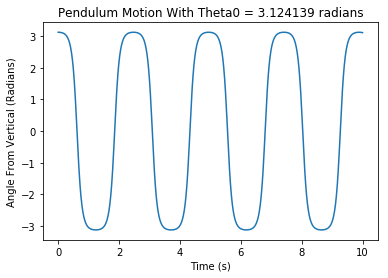

In [12]:
N = 1000 # Number of steps in calculation
r0 = np.array([((179 * np.pi) / 180), 0], float) # initial angle in radians, and initial angular frequency
a = 0 # Start time (s)
b = 10 # End time (s)

pendOutput = solve_coupled(pendulum, 2, r0, (a,b), N, order=4)

plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Angle From Vertical (Radians)")
plt.title("Pendulum Motion With Theta0 = {:2f} radians".format(r0[0]))

This plot models the angle of a pendulum with a length of 10cm as it swings over time. It is dropped from a starting angle of 179 degrees from vertical, and the initial angular velocity is zero. This plot shows that as the angle gets further away from zero, its angular velocity is smaller than what we would expect from a harmonic oscillator, and when the angle is close to zero, its angular velocity is at its maximum. This makes sense, because when the angle is close to 180 degrees, most of the gravitational force is applied in the direction of the arm and not perpendicular to it.

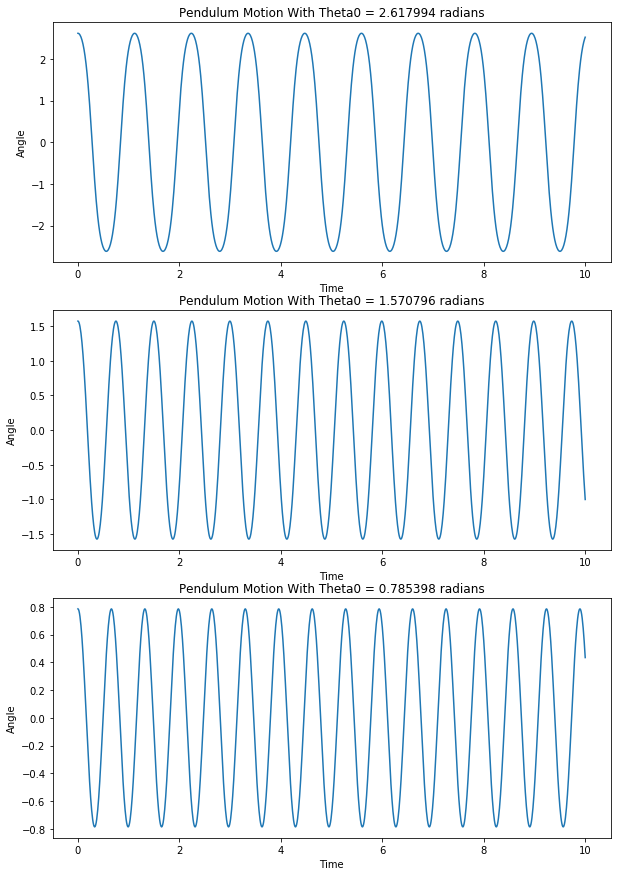

In [17]:
plt.figure(figsize = (10,15))

# Plots angle vs time where theta0 = 120
ax = plt.subplot(3,1,1)
r0 = np.array([((150 * np.pi) / 180), 0], float) 
pendOutput = solve_coupled(pendulum, 2, r0, (a,b), N, order=4)
plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time")
plt.ylabel("Angle")
plt.title("Pendulum Motion With Theta0 = {:2f} radians".format(r0[0]))

# Plots angle vs time where theta0 = 120
ax = plt.subplot(3,1,2)
r0 = np.array([((90 * np.pi) / 180), 0], float) 
pendOutput = solve_coupled(pendulum, 2, r0, (a,b), N, order=4)
plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time")
plt.ylabel("Angle")
plt.title("Pendulum Motion With Theta0 = {:2f} radians".format(r0[0]))

# Plots angle vs time where theta0 = 120
ax = plt.subplot(3,1,3)
r0 = np.array([((45 * np.pi) / 180), 0], float) 
pendOutput = solve_coupled(pendulum, 2, r0, (a,b), N, order=4)
plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time")
plt.ylabel("Angle")
plt.title("Pendulum Motion With Theta0 = {:2f} radians".format(r0[0]))

plt.show()

These plots show the motion of the same pendulum over time at various starting positions. In the first plot, the pendulum was released from an angle of 150 degrees. Here the plot looks more harmonic, but the shape of the wave as the angle reaches is maximum is still a little flattened. This is expected, because the angle is still large enough to affect the motion. The second plot represents a pendulum that has been released from an angle of 90 degrees. Its motion looks relatively harmonic, and this makes sense, because the pendulum motion won’t be affected much when the starting angle is less than or equal to 90 degrees. The third plot models the motion of a pendulum released from 45 degrees. This is very close to harmonic motion, and this makes sense, because the angle is small enough to approximate it as harmonic motion.

## Exercise 8.5

Text(0.5,1,'Driven Pendulum Motion With Omega = 5')

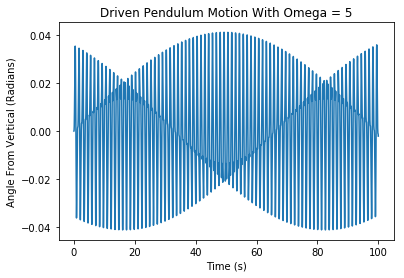

In [7]:
C = 2 # s^-1
ohm = 5 # s^-1
a = 0 # start time (s)
b = 100 # end time (s)
N = 10000 # Number of steps
r0 = np.array([((0 * np.pi) / 180), 0], float) # initial angle in radians, and initial angular frequency

def drivenPendulum (t,r):
    """Returs the result of the coupled differential calculation of a driven pendulum
    
    Arguements: t - time
                r - array containing theta and omega
    
    Returned: a new array with the differential theta and omega values
    """
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * np.sin(theta) + C * np.cos(theta) * np.sin (ohm * t)
    return np.array([ftheta, fomega], float)

pendOutput = solve_coupled(drivenPendulum, 2, r0, (a,b), N, order=4)

plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Angle From Vertical (Radians)")
plt.title("Driven Pendulum Motion With Omega = 5")

This plot shows the angle in radians verses time of a driven pendulum starting at rest. The driver has an omega value of 5s^-1 and a C value of 2s^-1, and the length of the arm is 10cm. The resulting plot shows beats, and this makes sense, because the driving oscillation is not at resonance, so at some points it cancels out the natural oscillation, and at other points it has constructive interference. 

Text(0.5,1,'Driven Pendulum Motion at Resonence with Omega = 7')

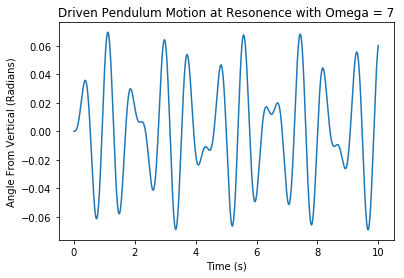

In [8]:
ohm = 7 #s^-1

pendOutput = solve_coupled(drivenPendulum, 2, r0, (a,10), N, order=4)

plt.plot(pendOutput[:,0],pendOutput[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Angle From Vertical (Radians)")
plt.title("Driven Pendulum Motion at Resonence with Omega = 7")

The goal of this exercise is to find the omega value where the driving force resonates with the pendulum. This plot shows the motion of a driven pendulum that is not at resonance, but its amplitude is relatively large. I know that it isn't at resonance, because its pattern is not harmonic, and also there are no clear beats. It oscillates with this random-seeming pattern, because the driving force is not in sync with the natural oscillation of the pendulum.